C:\Users\tobid\AppData\Local\Temp\ipykernel_36492\4025872588.py:13: UserWarning: genfromtxt: Empty input file: "logging\actions-log-2024-10-18-1436.csv"
  rows = genfromtxt(f, delimiter=',', encoding="utf8", dtype=int)
C:\Users\tobid\AppData\Local\Temp\ipykernel_36492\4025872588.py:13: UserWarning: genfromtxt: Empty input file: "logging\roshambo-log-20241011-1556.csv"
  rows = genfromtxt(f, delimiter=',', encoding="utf8", dtype=int)
C:\Users\tobid\AppData\Local\Temp\ipykernel_36492\4025872588.py:13: UserWarning: genfromtxt: Empty input file: "logging\roshambo-log-20241011-1600.csv"
  rows = genfromtxt(f, delimiter=',', encoding="utf8", dtype=int)
C:\Users\tobid\AppData\Local\Temp\ipykernel_36492\4025872588.py:13: UserWarning: genfromtxt: Empty input file: "logging\roshambo-log-20241011-1801.csv"
  rows = genfromtxt(f, delimiter=',', encoding="utf8", dtype=int)
C:\Users\tobid\AppData\Local\Temp\ipykernel_36492\4025872588.py:13: UserWarning: genfromtxt: Empty input file: "logging\roshamb

Text(0, 0.5, 'movements')

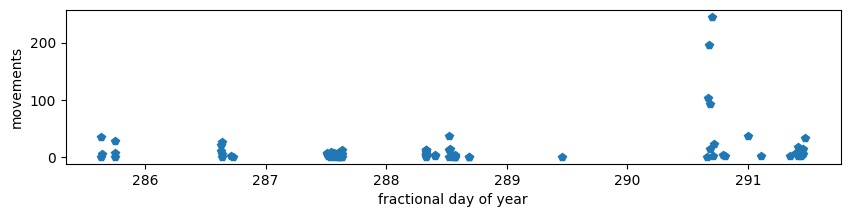

In [3]:
import os
from typing import Union
import matplotlib.pyplot as plt
import csv
from glob import glob
from numpy import genfromtxt
import numpy as np

dir='logging'
data=np.empty((0,6),dtype=int) # year,day_of_year,weekday,hour,minute,museum_movements_this_hour
for f in glob(os.path.join(dir,'*.csv')):
    # print(f'file {f}:')
    rows = genfromtxt(f, delimiter=',', encoding="utf8", dtype=int)
    # print(row)
    if len(rows.shape)==2 and rows.shape[0]>1: # has more than 1 row of data (first row is header that is int-parsed as vector of -1 values)
        data=np.append(data,rows[1:,:],axis=0)
days=data[:,1]
hours=data[:,3]
minutes=data[:,4]
frac_days=days+hours/24.0+minutes/(24.*60)
moves=data[:,5]
fig=plt.figure(figsize=(10,2))
plt.plot(frac_days,moves,'p')
plt.xlabel('fractional day of year')
plt.ylabel('movements')